In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import scipy as sp
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
!pwd
!ls -l

/Users/architaluvsu/Desktop/capstone-project
total 2567624
-rw-r--r--@ 1 architaluvsu  staff     2003630 Oct  5 19:44 2017-calculated-variables-version4-508.pdf
-rw-r--r--@ 1 architaluvsu  staff     1680765 Oct  5 19:44 2017_BRFSS_Pub_Ques_508_tagged.pdf
-rw-r--r--@ 1 architaluvsu  staff      537311 Oct  8 11:50 A-Recent-Study-on-High-Dimensional-Features-Used-in-Stego-Image-Anomaly-Detection.pdf
-rw-r--r--@ 1 architaluvsu  staff      801266 Oct  8 11:39 Data-Classification-and-Prediction.pdf
-rw-r--r--  1 architaluvsu  staff     4410555 Oct 20 16:25 Heart-disease prediction.ipynb
-rwxr-xr-x@ 1 architaluvsu  staff  1290238960 Sep  4  2018 LLCP2017.XPT
-rw-r--r--@ 1 architaluvsu  staff     1951489 Oct  8 11:49 Ontology-Based-Feature-Extraction-From-Text-Documents.pdf
-rw-r--r--@ 1 architaluvsu  staff      976635 Oct  8 11:46 Recent-Development-in-Big-Data-Analytics_-Research-Perspective.pdf
-rw-r--r--@ 1 architaluvsu  staff    10703542 Oct  5 19:44 codebook17_llcp-508.pdf
-rw-r--r--@ 1 

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('LLCP2017.XPT.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
ls

Heart-disease prediction.ipynb  README.md
LLCP2017.XPT                    __MACOSX/
LLCP2017.XPT.zip


### Data Wrangling

In [4]:
df = pd.read_sas('LLCP2017.XPT')

NameError: name 'pd' is not defined

In [7]:
df.shape

(450642, 358)

In [6]:
df['COLGHOUS'].value_counts()

1.0    41
Name: COLGHOUS, dtype: int64

In [33]:
df['_MICHD'].value_counts()

2.0    407088
1.0     39400
Name: _MICHD, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450642 entries, 0 to 450641
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), object(6)
memory usage: 1.2+ GB


In [7]:
df.head()

_STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0     1.0     1.0  b'01302017'  b'01'  b'30'  b'2017'    1100.0   
1     1.0     1.0  b'01122017'  b'01'  b'12'  b'2017'    1100.0   
2     1.0     1.0  b'01102017'  b'01'  b'10'  b'2017'    1100.0   
3     1.0     1.0  b'02082017'  b'02'  b'08'  b'2017'    1200.0   
4     1.0     1.0  b'01302017'  b'01'  b'30'  b'2017'    1100.0   

           SEQNO          _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  \
0  b'2017000001'  2.017000e+09       1.0       1.0       NaN       1.0   
1  b'2017000002'  2.017000e+09       1.0       1.0       NaN       1.0   
2  b'2017000003'  2.017000e+09       1.0       1.0       NaN       1.0   
3  b'2017000004'  2.017000e+09       1.0       1.0       NaN       1.0   
4  b'2017000005'  2.017000e+09       1.0       1.0       NaN       1.0   

   CELLFON4  LADULT  NUMADULT        NUMMEN  NUMWOMEN  SAFETIME  CTELNUM1  \
0       2.0     NaN       1.0  5.397605e-79       1.0       NaN       NaN   
1       2.0     NaN       2.0  1.000000e+00       1.0       NaN       NaN   
2       2.0     NaN       2.0  1.000000e+00       1.0       NaN       NaN   
3       2.0     NaN       1.0  5.397605e-79       1.0       NaN       NaN   
4       2.0     NaN       1.0  5.397605e-79       1.0       NaN       NaN   

   CELLFON5  CADULT  PVTRESD3  CCLGHOUS  CSTATE1  LANDLINE  HHADULT  GENHLTH  \
0       NaN     NaN       NaN       NaN      NaN       NaN      NaN      2.0   
1       NaN     NaN       NaN       NaN      NaN       NaN      NaN      2.0   
2       NaN     NaN       NaN       NaN      NaN       NaN      NaN      3.0   
3       NaN     NaN       NaN       NaN      NaN       NaN      NaN      4.0   
4       NaN     NaN       NaN       NaN      NaN       NaN      NaN      4.0   

   PHYSHLTH  MENTHLTH  POORHLTH  HLTHPLN1  PERSDOC2  MEDCOST  CHECKUP1  \
0      88.0      88.0       NaN       1.0       1.0      2.0       2.0   
1      88.0      88.0       NaN       1.0       1.0      2.0       1.0   
2      88.0      88.0       NaN       1.0       1.0      2.0       1.0   
3      88.0      88.0       NaN       1.0       1.0      2.0       1.0   
4      14.0      88.0      14.0       1.0       1.0      2.0       1.0   

   BPHIGH4  BPMEDS  CHOLCHK1  TOLDHI2  CHOLMED1  CVDINFR4  CVDCRHD4  CVDSTRK3  \
0      1.0     1.0       2.0      1.0       1.0       2.0       2.0       2.0   
1      1.0     1.0       2.0      2.0       NaN       2.0       2.0       2.0   
2      3.0     NaN       2.0      1.0       1.0       2.0       2.0       2.0   
3      1.0     1.0       2.0      1.0       2.0       2.0       2.0       2.0   
4      3.0     NaN       2.0      2.0       NaN       2.0       2.0       2.0   

   ASTHMA3  ASTHNOW  CHCSCNCR  CHCOCNCR  CHCCOPD1  HAVARTH3  ADDEPEV2  \
0      2.0      NaN       2.0       2.0       2.0       1.0       2.0   
1      2.0      NaN       2.0       2.0       2.0       2.0       2.0   
2      2.0      NaN       2.0       2.0       2.0       2.0       2.0   
3      2.0      NaN       1.0       2.0       1.0       2.0       1.0   
4      1.0      1.0       2.0       2.0       1.0       2.0       2.0   

   CHCKIDNY  DIABETE3  DIABAGE2  LMTJOIN3  ARTHDIS2  ARTHSOCL  JOINPAI1  SEX  \
0       2.0       1.0      68.0       2.0       2.0       3.0       2.0  2.0   
1       2.0       3.0       NaN       NaN       NaN       NaN       NaN  1.0   
2       2.0       3.0       NaN       NaN       NaN       NaN       NaN  1.0   
3       2.0       1.0      73.0       NaN       NaN       NaN       NaN  2.0   
4       2.0       3.0       NaN       NaN       NaN       NaN       NaN  2.0   

   MARITAL  EDUCA  RENTHOM1  NUMHHOL2  NUMPHON2  CPDEMO1A  VETERAN3  EMPLOY1  \
0      3.0    6.0       1.0       2.0       NaN       1.0       1.0      7.0   
1      1.0    6.0       1.0       1.0       2.0       1.0       2.0      7.0   
2      1.0    2.0       1.0       2.0       NaN       1.0       2.0      7.0   
3      3.0    3.0       1.0       2.0  

### Extracting variables included only in the 'core'  modules for all states from the original BRFSS data set: heart_coredata
- Leaving the variables included only in the optional modules for some selected states

In [16]:
heart_coredata = df.drop(df.loc[:,'PDIABTST':'_LLCPWT2'].head(0).columns, axis = 1)

In [11]:
heart_coredata.shape

(450642, 208)

In [12]:
type(heart_coredata)

pandas.core.frame.DataFrame

In [13]:
heart_coredata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450642 entries, 0 to 450641
Columns: 208 entries, _STATE to _AIDTST3
dtypes: float64(203), object(5)
memory usage: 715.1+ MB


There are 203 numeric (decimal) columns and 5 object (string columns) in the dataframe 'heart_coredata'

### Data Cleaning 



##### Object Variables
The object or string columns in the dataframe are: IDATE (Interview date) , IMONTH (Interview Month), IDAY (Interview Day), IYEAR (Interview Year), SEQNO (Annual Sequence Number)

In [17]:
heart_coredata.select_dtypes(include=['object'])

IDATE IMONTH   IDAY    IYEAR          SEQNO
0       b'01302017'  b'01'  b'30'  b'2017'  b'2017000001'
1       b'01122017'  b'01'  b'12'  b'2017'  b'2017000002'
2       b'01102017'  b'01'  b'10'  b'2017'  b'2017000003'
3       b'02082017'  b'02'  b'08'  b'2017'  b'2017000004'
4       b'01302017'  b'01'  b'30'  b'2017'  b'2017000005'
5       b'01302017'  b'01'  b'30'  b'2017'  b'2017000006'
6       b'01052017'  b'01'  b'05'  b'2017'  b'2017000007'
7       b'02022017'  b'02'  b'02'  b'2017'  b'2017000008'
8       b'01242017'  b'01'  b'24'  b'2017'  b'2017000009'
9       b'01122017'  b'01'  b'12'  b'2017'  b'2017000010'
10      b'01032017'  b'01'  b'03'  b'2017'  b'2017000011'
11      b'01152017'  b'01'  b'15'  b'2017'  b'2017000012'
12      b'01092017'  b'01'  b'09'  b'2017'  b'2017000013'
13      b'01042017'  b'01'  b'04'  b'2017'  b'2017000014'
14      b'01052017'  b'01'  b'05'  b'2017'  b'2017000015'
15      b'01112017'  b'01'  b'11'  b'2017'  b'2017000016'
16      b'01302017'  b'01'  b'30'  b'2017'  b'2017000017'
17      b'01102017'  b'01'  b'10'  b'2017'  b'2017000018'
18      b'01302017'  b'01'  b'30'  b'2017'  b'2017000019'
19      b'01112017'  b'01'  b'11'  b'2017'  b'2017000020'
20      b'01252017'  b'01'  b'25'  b'2017'  b'2017000021'
21      b'02082017'  b'02'  b'08'  b'2017'  b'2017000022'
22      b'02212017'  b'02'  b'21'  b'2017'  b'2017000023'
23      b'02062017'  b'02'  b'06'  b'2017'  b'2017000024'
24      b'02112017'  b'02'  b'11'  b'2017'  b'2017000025'
25      b'02212017'  b'02'  b'21'  b'2017'  b'2017000026'
26      b'02272017'  b'02'  b'27'  b'2017'  b'2017000027'
27      b'02022017'  b'02'  b'02'  b'2017'  b'2017000028'
28      b'02232017'  b'02'  b'23'  b'2017'  b'2017000029'
29      b'02172017'  b'02'  b'17'  b'2017'  b'2017000030'
30      b'02142017'  b'02'  b'14'  b'2017'  b'2017000031'
31      b'02122017'  b'02'  b'12'  b'2017'  b'2017000032'
32      b'02022017'  b'02'  b'02'  b'2017'  b'2017000033'
33      b'02062017'  b'02'  b'06'  b'2017'  b'2017000034'
34      b'02122017'  b'02'  b'12'  b'2017'  b'2017000035'
35      b'02012017'  b'02'  b'01'  b'2017'  b'2017000036'
36      b'02102017'  b'02'  b'10'  b'2017'  b'2017000037'
37      b'02212017'  b'02'  b'21'  b'2017'  b'2017000038'
38      b'02022017'  b'02'  b'02'  b'2017'  b'2017000039'
39      b'02102017'  b'02'  b'10'  b'2017'  b'2017000040'
40      b'02072017'  b'02'  b'07'  b'2017'  b'2017000041'
41      b'02022017'  b'02'  b'02'  b'2017'  b'2017000042'
42      b'02212017'  b'02'  b'21'  b'2017'  b'2017000043'
43      b'02122017'  b'02'  b'12'  b'2017'  b'2017000044'
44      b'02102017'  b'02'  b'10'  b'2017'  b'2017000045'
45      b'02092017'  b'02'  b'09'  b'2017'  b'2017000046'
46      b'02212017'  b'02'  b'21'  b'2017'  b'2017000047'
47      b'02222017'  b'02'  b'22'  b'2017'  b'2017000048'
48      b'02232017'  b'02'  b'23'  b'2017'  b'2017000049'
49      b'02012017'  b'02'  b'01'  b'2017'  b'2017000050'
50      b'03102017'  b'03'  b'10'  b'2017'  b'2017000051'
51      b'03042017'  b'03'  b'04'  b'2017'  b'2017000052'
52      b'03032017'  b'03'  b'03'  b'2017'  b'2017000053'
53      b'03302017'  b'03'  b'30'  b'2017'  b'2017000054'
54      b'03022017'  b'03'  b'02'  b'2017'  b'2017000055'
55      b'03282017'  b'03'  b'28'  b'2017'  b'2017000056'
56      b'03082017'  b'03'  b'08'  b'2017'  b'2017000057'
57      b'03022017'  b'03'  b'02'  b'2017'  b'2017000058'
58      b'03022017'  b'03'  b'02'  b'2017'  b'2017000059'
59      b'03132017'  b'03'  b'13'  b'2017'  b'2017000060'
60      b'03042017'  b'03'  b'04'  b'2017'  b'2017000061'
61      b'03192017'  b'03'  b'19'  b'2017'  b'2017000062'
62      b'03202017'  b'03'  b'20'  b'2017'  b'2017000063'
63      b'03022017'  b'03'  b'02'  b'2017'  b'2017000064'
64      b'03022017'  b'03'  b'02'  b'2017'  b'2017000065'
65      b'03022017'  b'03'  b'02'  b'2017'  b'2017000066'
66      b'03282017'  b'03'  b'28'  b'2017'  b'2017000067'
67      b'03042017'  b'03'  b'04'  b'2017'  b'2017000068'
68      b'03

#### Dropping the 'object or string' variables: IDATE, IYEAR, SEQNO

In [18]:
heart_core = heart_coredata.drop(['IDATE', 'IYEAR', 'SEQNO'], axis = 1)

In [24]:
heart_core['_MICHD'].describe()

count    446488.000000
mean          1.911756
std           0.283650
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: _MICHD, dtype: float64

In [19]:
heart_core.shape

(450642, 205)

In [11]:
#heart_coredata.select_dtypes(include=['category'])

There are no categorical data in the dataframe.

### Handling Missing Values 

- first, drop the observations with missing values in the outcome variable : '_MICHD' as the model is not learning anything from the missing observations in  the outcome variable, _MICHD

- second, replace the missing values in numerical variables with their means 

### Dropping the missing observations in the outcome variable: _MICHD

In [20]:
# Dropping observations with missing values in '_MICHD'

heart_core = heart_core.dropna(subset = ['_MICHD'])

In [21]:
heart_core.shape

(446488, 205)

- There are about 4000 observations with missing values in '_MICHD' , which are dropped

In [41]:
#list(heart_core.columns)

### Identifying the categorical variables and numerical variables by number of unique values - nunique()

In [22]:
for col in list(heart_core.columns):
    print(col, heart_core[col].nunique())

_STATE 53
FMONTH 12
IMONTH 12
IDAY 31
DISPCODE 2
_PSU 22056
CTELENM1 1
PVTRESD1 2
COLGHOUS 1
STATERE1 1
CELLFON4 2
LADULT 2
NUMADULT 17
NUMMEN 13
NUMWOMEN 12
SAFETIME 1
CTELNUM1 1
CELLFON5 1
CADULT 2
PVTRESD3 2
CCLGHOUS 1
CSTATE1 2
LANDLINE 4
HHADULT 29
GENHLTH 7
PHYSHLTH 33
MENTHLTH 33
POORHLTH 33
HLTHPLN1 4
PERSDOC2 5
MEDCOST 4
CHECKUP1 7
BPHIGH4 6
BPMEDS 4
CHOLCHK1 7
TOLDHI2 4
CHOLMED1 4
CVDINFR4 4
CVDCRHD4 4
CVDSTRK3 4
ASTHMA3 4
ASTHNOW 4
CHCSCNCR 4
CHCOCNCR 4
CHCCOPD1 4
HAVARTH3 4
ADDEPEV2 4
CHCKIDNY 4
DIABETE3 6
DIABAGE2 98
LMTJOIN3 4
ARTHDIS2 4
ARTHSOCL 5
JOINPAI1 13
SEX 3
MARITAL 7
EDUCA 7
RENTHOM1 5
NUMHHOL2 4
NUMPHON2 8
CPDEMO1A 4
VETERAN3 4
EMPLOY1 9
CHILDREN 21
INCOME2 10
INTERNET 4
WEIGHT2 573
HEIGHT3 143
PREGNANT 4
DEAF 4
BLIND 4
DECIDE 4
DIFFWALK 4
DIFFDRES 4
DIFFALON 4
SMOKE100 4
SMOKDAY2 5
STOPSMK2 4
LASTSMK2 10
USENOW3 5
ECIGARET 4
ECIGNOW 5
ALCDAY5 40
AVEDRNK2 57
DRNK3GE5 43
MAXDRNKS 62
FRUIT2 143
FRUITJU2 116
FVGREEN1 132
FRENCHF1 109
POTATOE1 102
VEGETAB2 132
EXERA

In [18]:
# The variables is categorical var if number of unique values <= 20, otherwise it is a numerical value

cat_vars = []
noncat_vars = []

for col in list(heart_core.columns):
    if heart_core[col].nunique() <= 20: 
        cat_vars.append(col)
    else:
        noncat_vars.append(col)

In [19]:
len(cat_vars)

142

In [40]:
heart_core[cat_vars].describe()

FMONTH       DISPCODE  CTELENM1       PVTRESD1  COLGHOUS  \
count  446488.000000  446488.000000  195526.0  195526.000000      40.0   
mean        6.485361    1116.060902       1.0       1.000205       1.0   
std         3.381765      36.717035       0.0       0.014302       0.0   
min         1.000000    1100.000000       1.0       1.000000       1.0   
25%         4.000000    1100.000000       1.0       1.000000       1.0   
50%         7.000000    1100.000000       1.0       1.000000       1.0   
75%         9.000000    1100.000000       1.0       1.000000       1.0   
max        12.000000    1200.000000       1.0       2.000000       1.0   

       STATERE1       CELLFON4     LADULT       NUMADULT        NUMMEN  \
count  195526.0  195526.000000  40.000000  195511.000000  1.955120e+05   
mean        1.0       1.533811   1.650000       1.766862  7.887035e-01   
std         0.0       0.498857   0.483046       0.794804  6.198255e-01   
min         1.0       1.000000   1.000000       1.000000  5.397605e-79   
25%         1.0       1.000000   1.000000       1.000000  5.397605e-79   
50%         1.0       2.000000   2.000000       2.000000  1.000000e+00   
75%         1.0       2.000000   2.000000       2.000000  1.000000e+00   
max         1.0       2.000000   2.000000      25.000000  1.400000e+01   

           NUMWOMEN  SAFETIME  CTELNUM1  CELLFON5         CADULT  \
count  1.955120e+05  250962.0  250962.0  250962.0  250962.000000   
mean   9.781343e-01       1.0       1.0       1.0       1.487715   
std    5.254762e-01       0.0       0.0       0.0       0.499850   
min    5.397605e-79       1.0       1.0       1.0       1.000000   
25%    1.000000e+00       1.0       1.0       1.0       1.000000   
50%    1.000000e+00       1.0       1.0       1.0       1.000000   
75%    1.000000e+00       1.0       1.0       1.0       2.000000   
max    2.400000e+01       1.0       1.0       1.0       2.000000   

            PVTRESD3  CCLGHOUS        CSTATE1       LANDLINE        GENHLTH  \
count  250962.000000    1177.0  250961.000000  250955.000000  446486.000000   
mean        1.004690       1.0       1.073302       1.676520       2.597161   
std         0.068323       0.0       0.260632       0.525197       1.111065   
min         1.000000       1.0       1.000000       1.000000       1.000000   
25%         1.000000       1.0       1.000000       1.000000       2.000000   
50%         1.000000       1.0       1.000000       2.000000       3.000000   
75%         1.000000       1.0       1.000000       2.000000       3.000000   
max         2.000000       1.0       2.000000       9.000000       9.000000   

            HLTHPLN1       PERSDOC2        MEDCOST       CHECKUP1  \
count  446488.000000  446486.000000  446488.000000  446488.000000   
mean        1.105217       1.427606       1.909921       1.570810   
std         0.498199       0.849866       0.423340       1.235633   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       2.000000       1.000000   
50%         1.000000       1.000000       2.000000       1.000000   
75%         1.000000       1.000000       2.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

             BPHIGH4         BPMEDS       CHOLCHK1        TOLDHI2  \
count  446488.000000  178788.000000  446487.000000  419017.000000   
mean        2.213289       1.187619       2.503405       1.674989   
std         1.029075       0.472637       1.298674       0.726181   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       2.000000       1.000000   
50%         3.000000       1.000000       2.000000       2.000000   
75%         3.000000       1.000000       2.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

            CHOLMED1       CVDINFR4       CVDCRHD4       CVDSTRK3  \
count  156875.000000  446488.000000  44648

In [46]:
heart_core[cat_vars].describe().iloc[0]/heart_core.shape[0]

FMONTH      1.000000
DISPCODE    1.000000
CTELENM1    0.437920
PVTRESD1    0.437920
COLGHOUS    0.000090
STATERE1    0.437920
CELLFON4    0.437920
LADULT      0.000090
NUMADULT    0.437886
NUMMEN      0.437889
NUMWOMEN    0.437889
SAFETIME    0.562080
CTELNUM1    0.562080
CELLFON5    0.562080
CADULT      0.562080
PVTRESD3    0.562080
CCLGHOUS    0.002636
CSTATE1     0.562078
LANDLINE    0.562064
GENHLTH     0.999996
HLTHPLN1    1.000000
PERSDOC2    0.999996
MEDCOST     1.000000
CHECKUP1    1.000000
BPHIGH4     1.000000
BPMEDS      0.400432
CHOLCHK1    0.999998
TOLDHI2     0.938473
CHOLMED1    0.351353
CVDINFR4    1.000000
CVDCRHD4    1.000000
CVDSTRK3    1.000000
ASTHMA3     1.000000
ASTHNOW     0.138111
CHCSCNCR    1.000000
CHCOCNCR    0.999998
CHCCOPD1    1.000000
HAVARTH3    0.999998
ADDEPEV2    0.999998
CHCKIDNY    0.999998
DIABETE3    0.999996
LMTJOIN3    0.325704
ARTHDIS2    0.325706
ARTHSOCL    0.325706
JOINPAI1    0.325686
SEX         1.000000
MARITAL     0.999989
EDUCA       0

In [39]:
heart_core[cat_vars].head()

FMONTH IMONTH  DISPCODE  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELLFON4  \
0     1.0  b'01'    1100.0       1.0       1.0       NaN       1.0       2.0   
1     1.0  b'01'    1100.0       1.0       1.0       NaN       1.0       2.0   
2     1.0  b'01'    1100.0       1.0       1.0       NaN       1.0       2.0   
3     1.0  b'02'    1200.0       1.0       1.0       NaN       1.0       2.0   
4     1.0  b'01'    1100.0       1.0       1.0       NaN       1.0       2.0   

   LADULT  NUMADULT        NUMMEN  NUMWOMEN  SAFETIME  CTELNUM1  CELLFON5  \
0     NaN       1.0  5.397605e-79       1.0       NaN       NaN       NaN   
1     NaN       2.0  1.000000e+00       1.0       NaN       NaN       NaN   
2     NaN       2.0  1.000000e+00       1.0       NaN       NaN       NaN   
3     NaN       1.0  5.397605e-79       1.0       NaN       NaN       NaN   
4     NaN       1.0  5.397605e-79       1.0       NaN       NaN       NaN   

   CADULT  PVTRESD3  CCLGHOUS  CSTATE1  LANDLINE  GENHLTH  HLTHPLN1  PERSDOC2  \
0     NaN       NaN       NaN      NaN       NaN      2.0       1.0       1.0   
1     NaN       NaN       NaN      NaN       NaN      2.0       1.0       1.0   
2     NaN       NaN       NaN      NaN       NaN      3.0       1.0       1.0   
3     NaN       NaN       NaN      NaN       NaN      4.0       1.0       1.0   
4     NaN       NaN       NaN      NaN       NaN      4.0       1.0       1.0   

   MEDCOST  CHECKUP1  BPHIGH4  BPMEDS  CHOLCHK1  TOLDHI2  CHOLMED1  CVDINFR4  \
0      2.0       2.0      1.0     1.0       2.0      1.0       1.0       2.0   
1      2.0       1.0      1.0     1.0       2.0      2.0       NaN       2.0   
2      2.0       1.0      3.0     NaN       2.0      1.0       1.0       2.0   
3      2.0       1.0      1.0     1.0       2.0      1.0       2.0       2.0   
4      2.0       1.0      3.0     NaN       2.0      2.0       NaN       2.0   

   CVDCRHD4  CVDSTRK3  ASTHMA3  ASTHNOW  CHCSCNCR  CHCOCNCR  CHCCOPD1  \
0       2.0       2.0      2.0      NaN       2.0       2.0       2.0   
1       2.0       2.0      2.0      NaN       2.0       2.0       2.0   
2       2.0       2.0      2.0      NaN       2.0       2.0       2.0   
3       2.0       2.0      2.0      NaN       1.0       2.0       1.0   
4       2.0       2.0      1.0      1.0       2.0       2.0       1.0   

   HAVARTH3  ADDEPEV2  CHCKIDNY  DIABETE3  LMTJOIN3  ARTHDIS2  ARTHSOCL  \
0       1.0       2.0       2.0       1.0       2.0       2.0       3.0   
1       2.0       2.0       2.0       3.0       NaN       NaN       NaN   
2       2.0       2.0       2.0       3.0       NaN       NaN       NaN   
3       2.0       1.0       2.0       1.0       NaN       NaN       NaN   
4       2.0       2.0       2.0       3.0       NaN       NaN       NaN   

   JOINPAI1  SEX  MARITAL  EDUCA  RENTHOM1  NUMHHOL2  NUMPHON2  CPDEMO1A  \
0       2.0  2.0      3.0    6.0       1.0       2.0       NaN       1.0   
1       NaN  1.0      1.0    6.0       1.0       1.0       2.0       1.0   
2       NaN  1.0      1.0    2.0       1.0       2.0       NaN       1.0   
3       NaN  2.0      3.0    3.0       1.0       2.0       NaN       1.0   
4       NaN  2.0      3.0    2.0       2.0       2.0       NaN       2.0   

   VETERAN3  EMPLOY1  INCOME2  INTERNET  PREGNANT  DEAF  BLIND  DECIDE  \
0       1.0      7.0      6.0       1.0       NaN   1.0    2.0     2.0   
1       2.0      7.0      8.0       1.0       NaN   2.0    2.0     2.0   
2       2.0      7.0     99.0       2.0       NaN   2.0    2.0     2.0   
3       2.0      7.0      1.0       2.0       NaN   2.0    2.0     1.0   
4       2.0      8.0      2.0       2.0       NaN   2.0    2.0     2.0   

   DIFFWALK  DIFFDRES  DIFFALON  SMOKE100  SMOKDAY2  STOPSMK2  LASTSMK2  \
0       1.0       2.0       2.0       2.0       NaN       NaN       NaN   
1       2.0       2.0       2.0       2.0       NaN       NaN       NaN   
2       2.0       2.0       2.0       2.0       NaN       NaN       NaN   

In [42]:
heart_core[cat_vars].describe(include=['O'])

IMONTH
count   446488
unique      12
top      b'08'
freq     43461

In [37]:
heart_core['COLGHOUS'].value_counts()

1.0    40
Name: COLGHOUS, dtype: int64

In [20]:
len(noncat_vars)

63

In [36]:
type(noncat_vars)

list

- There are 142 categorical variables and 63 numerical values

### Replacing the missing values
- if the variable is categorical, NaN are replaced by mode of the variable
- if the variable is numerical, NaN are replaced by the mean

In [23]:
#replacing the missing values in numerical variables with their corresponding means
heart_core = heart_core.fillna(heart_core[noncat_vars].mean(), inplace=True)

NameError: name 'noncat_vars' is not defined

In [15]:
#replacing the missing values in categorial variables with their corresponding mode
heart_core = heart_core.fillna(heart_core[cat_vars].mode(), inplace = True)

NameError: name 'heart_core' is not defined

In [58]:
heart_core.head()

AttributeError: 'NoneType' object has no attribute 'head'

### Creating dummy variables for categorical variables : cat_vars

In [101]:
pd.get_dummies(heart_core.IMONTH, prefix='month')

month_b'01'  month_b'02'  month_b'03'  month_b'04'  month_b'05'  \
0                 1            0            0            0            0   
1                 1            0            0            0            0   
2                 1            0            0            0            0   
3                 0            1            0            0            0   
4                 1            0            0            0            0   
5                 1            0            0            0            0   
6                 1            0            0            0            0   
7                 0            1            0            0            0   
8                 1            0            0            0            0   
9                 1            0            0            0            0   
10                1            0            0            0            0   
11                1            0            0            0            0   
12                1            0            0            0            0   
13                1            0            0            0            0   
14                1            0            0            0            0   
15                1            0            0            0            0   
16                1            0            0            0            0   
17                1            0            0            0            0   
18                1            0            0            0            0   
19                1            0            0            0            0   
20                1            0            0            0            0   
21                0            1            0            0            0   
22                0            1            0            0            0   
23                0            1            0            0            0   
24                0            1            0            0            0   
25                0            1            0            0            0   
26                0            1            0            0            0   
27                0            1            0            0            0   
28                0            1            0            0            0   
29                0            1            0            0            0   
30                0            1            0            0            0   
31                0            1            0            0            0   
32                0            1            0            0            0   
33                0            1            0            0            0   
34                0            1            0            0            0   
35                0            1            0            0            0   
36                0            1            0            0            0   
37                0            1            0            0            0   
38                0            1            0            0            0   
39                0            1            0            0            0   
40                0            1            0            0            0   
41                0            1            0            0            0   
42                0            1            0            0            0   
43                0            1            0            0            0   
44                0            1            0            0            0   
45                0            1            0            0            0   
46                0            1            0            0            0   
47                0            1            0            0            0   
48                0            1            0            0            0   
49                0            1            0            0            0   
50                0            0            1            0            0   
51                0            0            1            0            0   
52                0            0 

In [26]:
pd.get_dummies(heart_core[cat_vars], dummy_na=True)

FMONTH  DISPCODE  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELLFON4  \
0          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
1          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
2          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
3          1.0    1200.0       1.0       1.0       NaN       1.0       2.0   
4          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
5          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
6          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
7          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
8          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
9          1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
10         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
11         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
12         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
13         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
14         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
15         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
16         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
17         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
18         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
19         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
20         1.0    1100.0       1.0       1.0       NaN       1.0       2.0   
21         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
22         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
23         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
24         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
25         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
26         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
27         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
28         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
29         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
30         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
31         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
32         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
33         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
34         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
35         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
36         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
37         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
38         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
39         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
40         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
41         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
42         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
43         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
44         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
45         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
46         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
47         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
48         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
49         2.0    1100.0       1.0       1.0       NaN       1.0       2.0   
50         3.0    1100.0      

In [30]:
#pd.get_dummies(heart_core._PHYS14D)

### Data Exploration

In [28]:
'''#Use plotly.offline.iplot() when working offline in a Jupyter Notebook to display the plot in the notebook.
plotly.offline.iplot({
    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": go.Layout(title="hello world")
})'''

'#Use plotly.offline.iplot() when working offline in a Jupyter Notebook to display the plot in the notebook.\nplotly.offline.iplot({\n    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],\n    "layout": go.Layout(title="hello world")\n})'

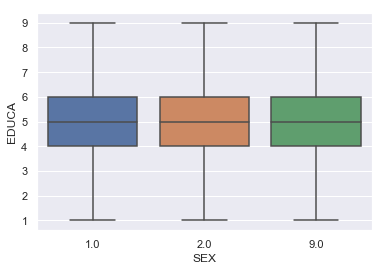

In [59]:
sns.boxplot(x="SEX", y="EDUCA", data= heart_core)

In [29]:
np.mean(heart_core.EDUCA)

4.946007420623297

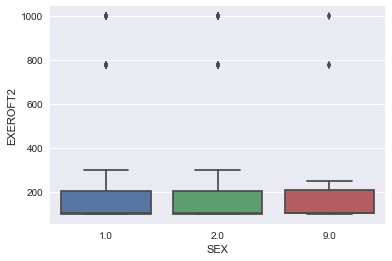

In [27]:
sns.boxplot(x="SEX", y="EXEROFT2", data= heart_core)

### Random Forest Classifier Model for prediction of heart disease (_MICHD)

In [67]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [73]:
X = heart_core.drop(['_MICHD'], axis = 1)
y = heart_core['_MICHD']

In [74]:
type(X)

pandas.core.frame.DataFrame

In [75]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [76]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ValueError: Unknown label type: 'continuous'

### Feature Selection

In [77]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

### Model with hand-selected features

In [30]:
heart = df[['_STATE', '_PSU', '_LLCPWT', '_BMI5CAT', '_RFBMI5','GENHLTH', '_RFHLTH', '_PHYS14D', '_RFCHOL1', '_RFHYPE5', '_CHOLCH1', '_MICHD', 'CVDINFR4', 'SEX', 'MARITAL', 'EDUCA','_EDUCAG', 'EMPLOY1', 'INCOME2', '_INCOMG', '_AGE_G','_AGEG5YR', '_AGE65YR', '_AGE80', '_RACE', '_HISPANC', '_SMOKER3', '_RFSMOK3', '_ECIGSTS', '_CURECIG', '_TOTINDA', '_PA150R2']]

In [31]:
heart.shape

(450642, 32)

(array([ 39400.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 407088.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

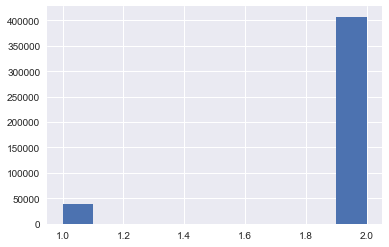

In [58]:
plt.hist(heart._MICHD.dropna())

(array([ 37730.,  62051.,  39785.,  53214.,      0., 182689.,      0.,
             0.,      0.,  75173.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

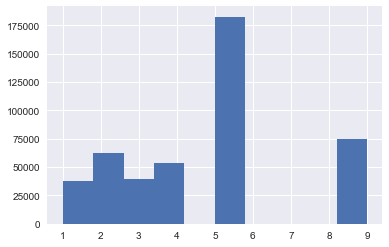

In [61]:
plt.hist(heart._INCOMG.dropna())

In [62]:
heart.describe()

_STATE          _PSU        _LLCPWT       _BMI5CAT  \
count  450642.000000  4.506420e+05  450642.000000  414139.000000   
mean       28.792030  2.017005e+09     567.308873       2.965789   
std        15.816012  4.285565e+03    1118.941528       0.829773   
min         1.000000  2.017000e+09       0.131624       1.000000   
25%        17.000000  2.017002e+09      91.195427       2.000000   
50%        27.000000  2.017004e+09     236.408514       3.000000   
75%        41.000000  2.017008e+09     591.793300       4.000000   
max        72.000000  2.017022e+09   45053.592726       4.000000   

             _RFBMI5        GENHLTH        _RFHLTH       _PHYS14D  \
count  450642.000000  450639.000000  450642.000000  450642.000000   
mean        2.265175       2.604415       1.212632       1.667616   
std         2.049546       1.114726       0.557071       1.286576   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       2.000000       1.000000       1.000000   
50%         2.000000       3.000000       1.000000       1.000000   
75%         2.000000       3.000000       1.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

            _RFCHOL1       _RFHYPE5       _CHOLCH1         _MICHD  \
count  399007.000000  450642.000000  450642.000000  446488.000000   
mean        1.393061       1.427250       1.541137       1.911756   
std         0.488431       0.647057       1.752743       0.283650   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       2.000000   
50%         1.000000       1.000000       1.000000       2.000000   
75%         2.000000       2.000000       1.000000       2.000000   
max         2.000000       9.000000       9.000000       2.000000   

            CVDINFR4            SEX        MARITAL          EDUCA  \
count  450640.000000  450642.000000  450635.000000  450636.000000   
mean        1.969222       1.562799       2.317887       4.946007   
std         0.443515       0.530423       1.720958       1.061763   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       1.000000       4.000000   
50%         2.000000       2.000000       1.000000       5.000000   
75%         2.000000       2.000000       3.000000       6.000000   
max         9.000000       9.000000       9.000000       9.000000   

             _EDUCAG        EMPLOY1        INCOME2        _INCOMG  \
count  450642.000000  450636.000000  447309.000000  450642.000000   
mean        2.979609       3.903607      19.171528       4.624613   
std         1.036024       2.872522      30.827662       2.361818   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       5.000000       3.000000   
50%         3.000000       3.000000       7.000000       5.000000   
75%         4.000000       7.000000       8.000000       5.000000   
max         9.000000       9.000000      99.000000       9.000000   

              _AGE_G       _AGEG5YR       _AGE65YR         _AGE80  \
count  450642.000000  450642.000000  450642.000000  450642.000000   
mean        4.415527       7.746828       1.374814      55.064064   
std         1.583124       3.557689       0.511335      17.324488   
min         1.000000       1.000000       1.000000      18.000000   
25%         3.000000       5.000000       1.000000      42.000000   
50%         5.000000       8.000000       1.000000      58.000000   
75%         6.000000      11.000000       2.000000      69.000000   
max         6.000000      14.000000       3.000000      80.000000   

               _RACE       _HISPANC       _SMOKER3       _RFSMOK3  \
count  450642.000000  450642.000000  450642.000000  450642.000000   
mean        2.076879       1.987542       3.556408       1.473977   
std         2.321530       0.755980       1.474447       1.606186   
min         1.0

In [37]:
heart.groupby('_STATE')['_MICHD'].count()

_STATE
1.0      6662
2.0      3185
4.0     15361
5.0      5235
6.0      9300
8.0      9725
9.0     10496
10.0     4103
11.0     4452
12.0    21801
13.0     5985
15.0     7712
16.0     4856
17.0     5531
18.0    13709
19.0     7644
20.0    21628
21.0     8555
22.0     4753
23.0     9631
24.0    13449
25.0     6845
26.0    10796
27.0    16958
28.0     5006
29.0     7518
30.0     5871
31.0    15217
32.0     3738
33.0     5711
34.0    11597
35.0     6479
36.0    12142
37.0     4873
38.0     6937
39.0    12173
40.0     6533
41.0     5316
42.0     6487
44.0     5574
45.0    11154
46.0     6953
47.0     5780
48.0    12134
49.0    10170
50.0     6461
51.0     9551
53.0    13160
54.0     5414
55.0     5771
56.0     4435
66.0     1490
72.0     4471
Name: _MICHD, dtype: int64

In [38]:
heart.groupby('SEX')['_MICHD'].count()

SEX
1.0    197054
2.0    249164
9.0       270
Name: _MICHD, dtype: int64

In [39]:
heart.groupby('_AGE_G')['_MICHD'].count()

_AGE_G
1.0     26166
2.0     47098
3.0     51911
4.0     69501
5.0     95877
6.0    155935
Name: _MICHD, dtype: int64

In [41]:
heart.groupby('_BMI5CAT')['_MICHD'].count()

_BMI5CAT
1.0      6855
2.0    128077
3.0    148087
4.0    127456
Name: _MICHD, dtype: int64

In [42]:
heart.groupby('MARITAL')['_MICHD'].count()

MARITAL
1.0    231597
2.0     60808
3.0     53724
4.0      9283
5.0     73548
6.0     14477
9.0      3046
Name: _MICHD, dtype: int64

In [43]:
heart.groupby('_RFBMI5')['_MICHD'].count()

_RFBMI5
1.0    134932
2.0    275543
9.0     36013
Name: _MICHD, dtype: int64

In [45]:
heart.groupby('_RACE')['_MICHD'].count()

_RACE
1.0    334626
2.0     35652
3.0      8274
4.0      9737
5.0      1536
6.0      2271
7.0      9065
8.0     36770
9.0      8557
Name: _MICHD, dtype: int64

In [46]:
heart.groupby('EDUCA')['_MICHD'].count()

EDUCA
1.0       614
2.0     10189
3.0     21186
4.0    121235
5.0    123759
6.0    167871
9.0      1630
Name: _MICHD, dtype: int64

In [51]:
heart.groupby('_EDUCAG')['_MICHD'].count()

_EDUCAG
1.0     31989
2.0    121235
3.0    123759
4.0    167871
9.0      1634
Name: _MICHD, dtype: int64

In [52]:
heart.groupby('EDUCA')['_MICHD'].count()

EDUCA
1.0       614
2.0     10189
3.0     21186
4.0    121235
5.0    123759
6.0    167871
9.0      1630
Name: _MICHD, dtype: int64

In [56]:
heart.groupby('SEX')['_MICHD'].count()

SEX
1.0    197054
2.0    249164
9.0       270
Name: _MICHD, dtype: int64

In [59]:
heart['_MICHD'].value_counts()

2.0    407088
1.0     39400
Name: _MICHD, dtype: int64